<a href="https://colab.research.google.com/github/Harshil-1234/100_Days_ML/blob/main/Day13(YT_course)_Toy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/ToyData.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info() # can tell whether column have any missing value or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape #100 rows, 4 columns

(100, 4)

In [6]:
# Step 0 : Preprocessing ke liye we have to remove only Unnamed column
df = df.iloc[:,1:] # we take every row, start column from index 1 instead of 0

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


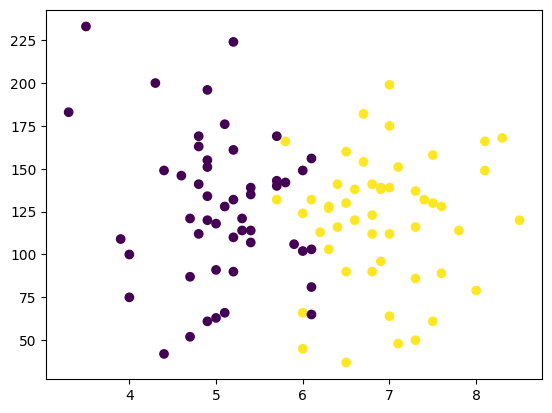

In [8]:
# EDA -> Plot graph
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

#Yellow -> placement hogya
#Purple -> placement nahi hua

In [9]:
# Separating input and output columns
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [16]:
# Performing train test split step
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)

In [19]:
X_test

,cgpa,iq
53,8.3,168.0
10,6.0,45.0
80,4.9,196.0
20,6.6,120.0
24,4.7,121.0
29,7.0,112.0
31,3.9,109.0
95,4.3,200.0
34,4.8,163.0
1,5.9,106.0


In [20]:
# Doing Scaling
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_train

array([[-1.10701052, -0.26773964],
       [ 0.33300316,  0.4772502 ],
       [ 0.69300658,  0.4772502 ],
       [-0.20700197,  0.5029395 ],
       [ 1.41301342, -0.85859365],
       [-0.83700795,  0.14328923],
       [ 0.42300402,  0.19466784],
       [ 2.22302112, -0.0622252 ],
       [-2.27702163,  2.84066624],
       [ 1.14301086,  0.37449298],
       [ 1.14301086, -0.93566157],
       [-1.01700966,  0.73414324],
       [-0.29700282,  0.24604645],
       [-1.01700966,  0.83690046],
       [ 0.87300829,  0.42587159],
       [ 0.87300829,  1.96722987],
       [-0.7470071 , -0.31911825],
       [ 0.69300658, -0.26773964],
       [ 1.14301086, -1.86047654],
       [ 1.41301342,  0.14328923],
       [-1.19701137, -1.80909793],
       [-1.28701223,  0.60569672],
       [-0.92700881, -0.80721504],
       [ 0.0630006 ,  0.86258977],
       [ 0.78300744,  0.42587159],
       [-1.82701736, -0.5760113 ],
       [ 1.14301086, -0.16498242],
       [ 0.96300915,  0.73414324],
       [-0.56700539,

In [31]:
X_test = scaler.transform(X_test)

In [32]:
X_test

array([[  8.3, 168. ],
       [  6. ,  45. ],
       [  4.9, 196. ],
       [  6.6, 120. ],
       [  4.7, 121. ],
       [  7. , 112. ],
       [  3.9, 109. ],
       [  4.3, 200. ],
       [  4.8, 163. ],
       [  5.9, 106. ]])

In [33]:
# Training model -> using LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [34]:
# .fit() used to train model
clf.fit(X_train,Y_train)

LogisticRegression()

In [39]:
#Evaluating model -> finding accuracy
Y_pred = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.4

<Axes: >

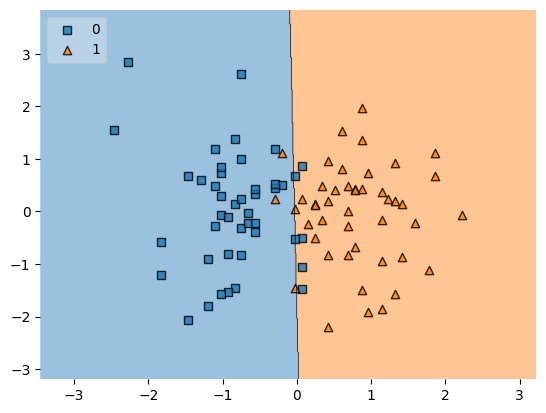

In [41]:
# Plotting decision boundaries -> tells model ne kis basis pr pattern banae hai
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [42]:
import pickle # This library is used to convert an object into file -> can convert model into a file

In [43]:
pickle.dump(clf,open('model.pkl','wb'))